In [25]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC 
from sklearn.metrics import classification_report 
from sklearn import metrics 
import seaborn as sn 

In [26]:
data = pd.read_csv("C:/Users/USER/OneDrive/Desktop/G NAVEEN KUMAR GOWDA/DATA/DataSet/college_student_placement_dataset.csv")
data

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [27]:
data.shape

(10000, 10)

In [28]:
data.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No
9999,CLG0060,109,9.41,9.77,8,No,3,5,5,No


In [29]:
data.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [40]:
x=data.iloc[:,1:-1].values  
y=data.iloc[:,-1].values
print(x,y)

[[107 161 173 ...   8   8   4]
 [ 97  52  82 ...   7   8   0]
 [109  36 128 ...   3   1   1]
 ...
 [ 89 108 170 ...   3   9   5]
 [107 377 437 ...   7   5   1]
 [109 441 522 ...   3   5   5]] [0 0 0 ... 0 0 0]


In [38]:
label=LabelEncoder()
data['Prev_Sem_Result']=label.fit_transform (data['Prev_Sem_Result'])
data['CGPA']=label.fit_transform (data['CGPA'])
data['Internship_Experience']=label.fit_transform (data['Internship_Experience'])
data['Placement']=label.fit_transform (data['Placement'])
data.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,341,374,4,0,1,8,0,1
9996,CLG0098,70,425,479,7,0,0,7,2,0
9997,CLG0066,89,108,170,3,1,3,9,5,0
9998,CLG0045,107,377,437,3,0,7,5,1,0
9999,CLG0060,109,441,522,8,0,3,5,5,0


In [37]:
data.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,341,374,4,0,1,8,0,1
9996,CLG0098,70,425,479,7,0,0,7,2,0
9997,CLG0066,89,108,170,3,1,3,9,5,0
9998,CLG0045,107,377,437,3,0,7,5,1,0
9999,CLG0060,109,441,522,8,0,3,5,5,0


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=5)
print(x_train, x_test, y_train, y_test)

[[ 98  57 140 ...   9   4   4]
 [ 89  31 121 ...   5   4   2]
 [123 114 167 ...   8   2   3]
 ...
 [ 95  56 149 ...   9   7   1]
 [ 81 461 467 ...   6   3   1]
 [127 275 337 ...   1   4   1]] [[102 247 298 ...  10   5   2]
 [ 68 112 119 ...   6   8   2]
 [ 91 212 290 ...   8   2   2]
 ...
 [105   7  65 ...   0  10   2]
 [ 77 109 117 ...   9   6   2]
 [ 72 288 337 ...   9   4   4]] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]


In [43]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_train=sc.fit_transform(x_train) 
x_test=sc.transform(x_test)
print(x_train,x_test)

[[-0.10560202 -1.34903942 -1.06864349 ...  1.2737859  -0.53008847
   0.87196711]
 [-0.70615511 -1.5280607  -1.19751187 ...  0.0034933  -0.53008847
  -0.29287445]
 [ 1.56260102 -0.9565697  -0.88551473 ...  0.95621275 -1.21960241
   0.28954633]
 ...
 [-0.30578638 -1.35592486 -1.00760057 ...  1.2737859   0.50418244
  -0.87529523]
 [-1.23998008  1.4326758   1.14924921 ...  0.32106645 -0.87484544
  -0.87529523]
 [ 1.8295135   0.15198513  0.26751817 ... -1.26679929 -0.53008847
  -0.87529523]] [[ 0.16131047 -0.04080701  0.00299885 ...  1.59135905 -0.1853315
  -0.29287445]
 [-2.10744566 -0.97034057 -1.21107697 ...  0.32106645  0.84893942
  -0.29287445]
 [-0.57269887 -0.2817972  -0.05126152 ...  0.95621275 -1.21960241
  -0.29287445]
 ...
 [ 0.36149483 -1.69331111 -1.57733448 ... -1.58437244  1.53845336
  -0.29287445]
 [-1.50689257 -0.99099687 -1.22464206 ...  1.2737859   0.15942547
  -0.29287445]
 [-1.84053317  0.24149577  0.26751817 ...  1.2737859  -0.53008847
   0.87196711]]


In [44]:
model= SVC(kernel='rbf',random_state=0) 
model.fit(x_train, y_train) 
svc_prediction=model.predict(x_test) 
print('svc_prediction: ', svc_prediction)

svc_prediction:  [0 0 0 ... 0 0 0]


In [45]:
conf_mat=metrics.confusion_matrix(y_test, svc_prediction) 
print('SVC [ kernerl - rbf ]') 
print('Confusion Matrix : \n', conf_mat) 
Accuracy_score=metrics.accuracy_score(y_test, svc_prediction) 
print('Accuracy Score : ', Accuracy_score) 
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%') 
print(classification_report(svc_prediction,y_test))

SVC [ kernerl - rbf ]
Confusion Matrix : 
 [[2438   64]
 [  96  402]]
Accuracy Score :  0.9466666666666667
Accuracy in Percentage :  94 %
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2534
           1       0.81      0.86      0.83       466

    accuracy                           0.95      3000
   macro avg       0.89      0.91      0.90      3000
weighted avg       0.95      0.95      0.95      3000



col_0     0    1
row_0           
0      2438   64
1        96  402


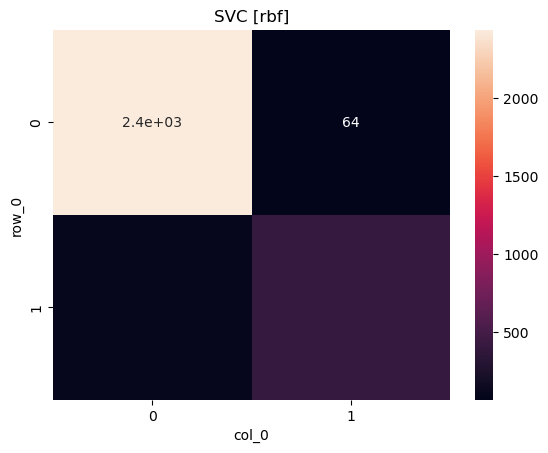

In [51]:
conf_mat=pd.crosstab(y_test, svc_prediction)
sn.heatmap(conf_mat, annot=True).set(title='SVC [rbf]') 
print(conf_mat)

In [53]:
model= SVC(kernel='linear',random_state=0)  
model.fit(x_train, y_train) 
svc_prediction=model.predict(x_test) 
print('svc_prediction: ', svc_prediction)

svc_prediction:  [0 0 0 ... 0 0 0]


In [54]:
conf_mat=metrics.confusion_matrix(y_test, svc_prediction) 
print('SVC [ kernerl - linear ]') 
print('Confusion Matrix : \n', conf_mat) 
Accuracy_score=metrics.accuracy_score(y_test, svc_prediction) 
print('Accuracy Score : ', Accuracy_score) 
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%') 
print(classification_report(svc_prediction,y_test))

SVC [ kernerl - linear ]
Confusion Matrix : 
 [[2395  107]
 [ 191  307]]
Accuracy Score :  0.9006666666666666
Accuracy in Percentage :  90 %
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2586
           1       0.62      0.74      0.67       414

    accuracy                           0.90      3000
   macro avg       0.79      0.83      0.81      3000
weighted avg       0.91      0.90      0.90      3000



[Text(0.5, 1.0, 'SVC [linear]')]

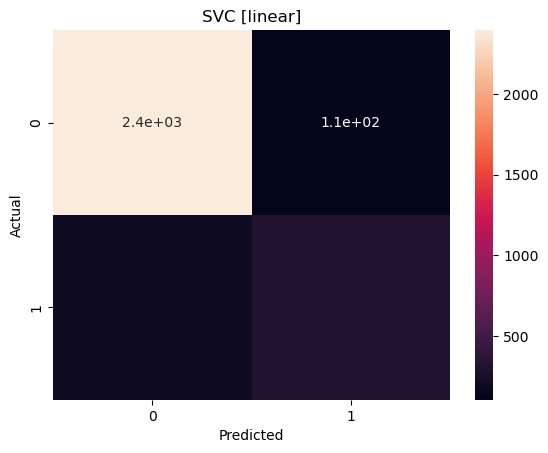

In [58]:
conf_mat=pd.crosstab(y_test, svc_prediction ,rownames=['Actual'], 
 colnames=['Predicted'])  
sn.heatmap(conf_mat, annot=True).set(title='SVC [linear]')